In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.applications import efficientnet_v2 as keras_model

2024-07-20 21:27:05.180589: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 21:27:05.188761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 21:27:05.198016: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 21:27:05.200801: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-20 21:27:05.208233: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = keras_model.EfficientNetV2L(weights='imagenet')

I0000 00:00:1721536026.038871   17423 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-20 21:27:06.057726: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


478307632/478307632 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


In [3]:
def load_as_array(path):
    img = utils.load_img(path, target_size=(480, 480))
    return utils.img_to_array(img)

In [4]:
rorschachs = np.array([load_as_array(f"inkblots/{i}.jpg") for i in range(1, 11)])

In [5]:
predictions = model.predict(keras_model.preprocess_input(rorschachs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [6]:
human_readable_predictions = keras_model.decode_predictions(predictions, top=2)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
def humanize_prediction(pred):
    name = pred[1]
    return name.replace("_", " ")

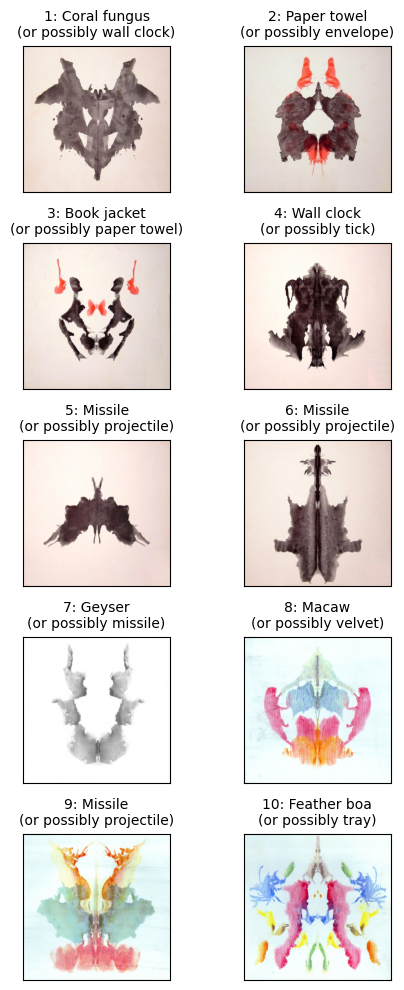

In [8]:
fig, axs = plt.subplots(5, 2, figsize=(5, 10))
flat_axs = [ax for axss in axs for ax in axss]

for i, ax, img, pred in zip(range(1, 11), flat_axs, rorschachs, human_readable_predictions):
    title = f"{i}: {humanize_prediction(pred[0]).capitalize()}\n(or possibly {humanize_prediction(pred[1])})"
    regularized_img = img + np.abs(np.min(img))
    ax.imshow(regularized_img / np.max(regularized_img))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title(title, fontsize=10)

fig.tight_layout()
fig.savefig("Rorschach.png")